In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from collections import Counter

Utilizamos el archivo "multipleChoiceResponses.csv" ya que es el que está más estandarizado.

In [2]:
data = pd.read_csv('kaggle-survey-2018/multipleChoiceResponses.csv')
questions = data.iloc[:1]
data1 = data.iloc[1:]

/srv/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# POBLACIÓN DE LOS PAÍSES
Aca cargamos una base de datos que tiene la poblacion de los paises hasta el año 2016

In [3]:
pop_data = pd.read_csv("https://raw.githubusercontent.com/datasets/population/master/data/population.csv").iloc[2624:]

In [4]:
pop2016condition = pop_data['Year'] == 2016
pop_data = pop_data[pop2016condition]

In [5]:
pop_data['Country Name'] = pop_data['Country Name'].replace('United States', 'United States of America')
pop_data['Country Name'] = pop_data['Country Name'].replace('United Kingdom', 'United Kingdom of Great Britain and Northern Ireland')
pop_data['Country Name'] = pop_data['Country Name'].replace('Iran, Islamic Rep.', 'Iran, Islamic Republic of...')
pop_data['Country Name'] = pop_data['Country Name'].replace("Korea, Dem. People's Rep.", 'Republic of Korea')
pop_data['Country Name'] = pop_data['Country Name'].replace("Korea, Rep.", 'South Korea')
pop_data['Country Name'] = pop_data['Country Name'].replace("Hong Kong SAR, China", "Hong Kong (S.A.R.)")

Estamos interesados en mostrar el porcentaje de personas (con respecto a la población del país) que respondieron la encuesta.

In [6]:
participation = Counter(data1['Q3'])

pop_data['new_index'] = range(len(pop_data)) #orders the list
pop_data = pop_data.set_index('new_index')
populations = {}
for l in range(len(pop_data['Country Name'])):
    populations[pop_data['Country Name'][l]] = pop_data['Value'][l]

porc_data = {}
for i in pop_data['Country Name']:
    if i in Counter(data1['Q3']):
        porc_data[i] = (participation[i]/populations[i])*100

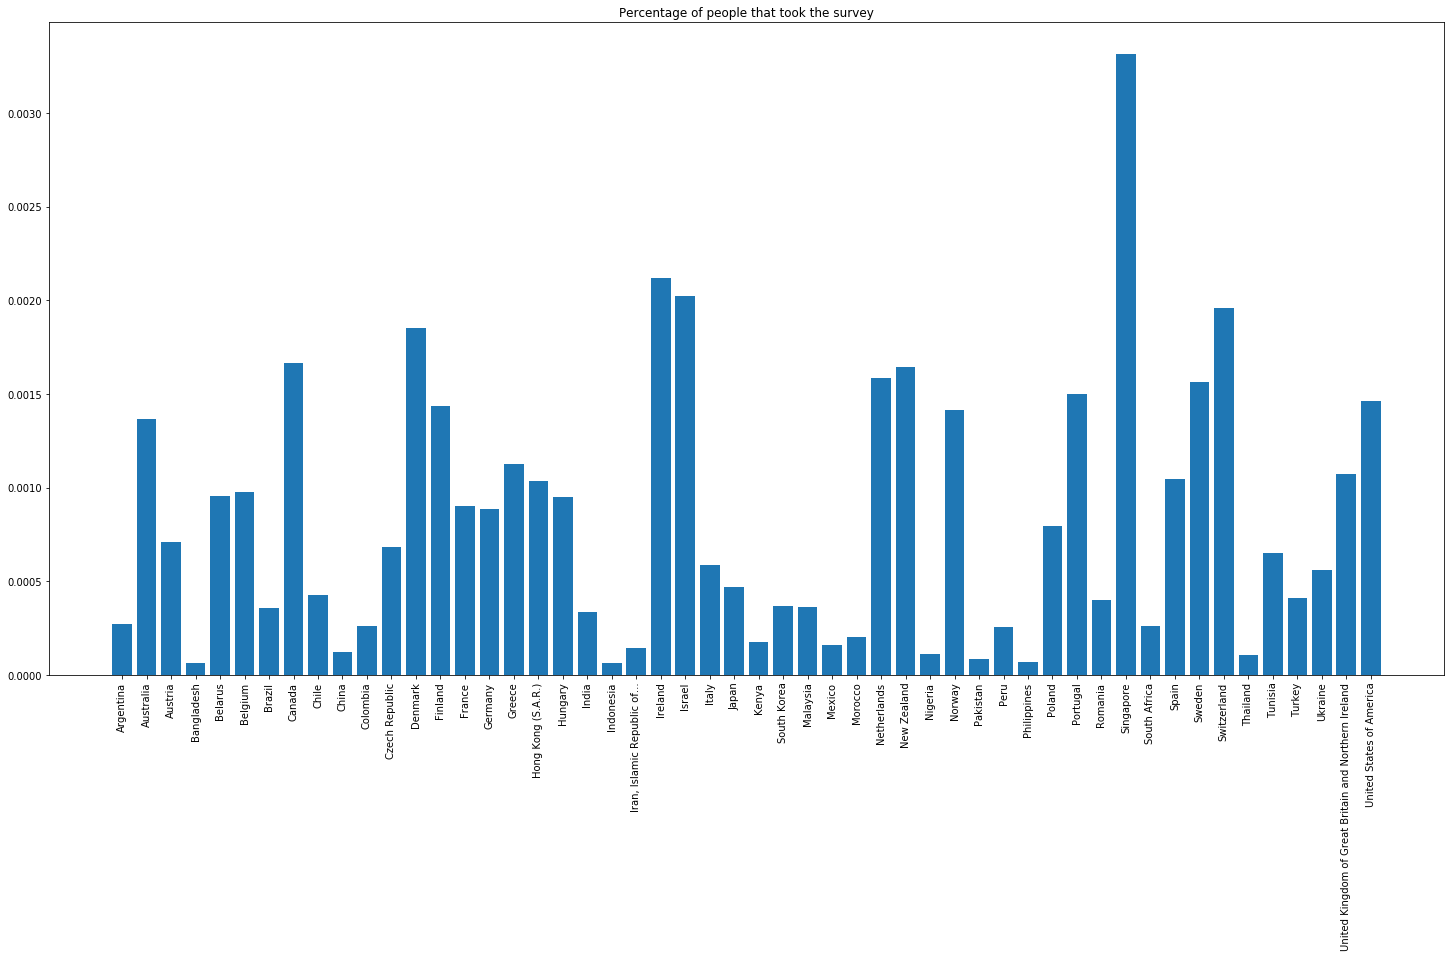

In [7]:
plt.figure(figsize=(25,12))
plt.bar(porc_data.keys(),porc_data.values())
plt.xticks(rotation=90)
plt.title('Percentage of people that took the survey')
plt.show()

La figura anterior muestra cualitativamente que en los países menos desarollados el porcentaje de gente que trabaja en DataScience es menor (al menos las personas que respondieron a la encuesta). Es relevante notar que USA tiene un mayor porcentaje de participantes que China e India.

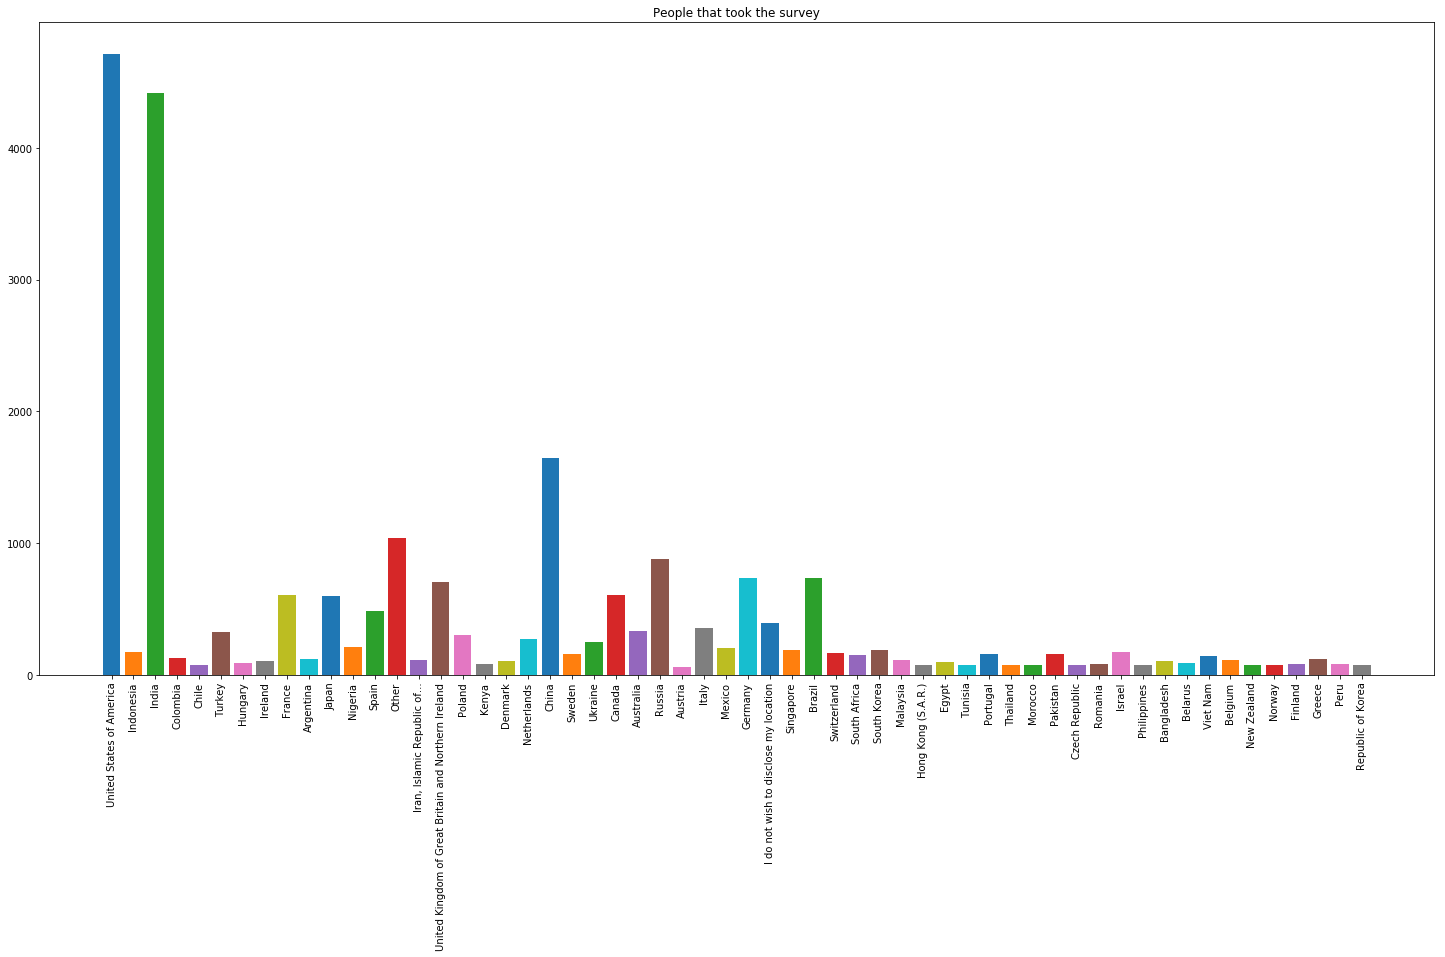

In [8]:
plt.figure(figsize=(25,12))
for i in Counter(data1["Q3"]):
    plt.bar(i,Counter(data1["Q3"])[i])
plt.xticks(rotation=90)
plt.title('People that took the survey')
plt.show()

Esta figura por el contrario muestra que la cantidad de participantes se concentra, como es de esperarse, en los tres países con mayor cantidad de habitantes (USA, India y China).

# GÉNERO

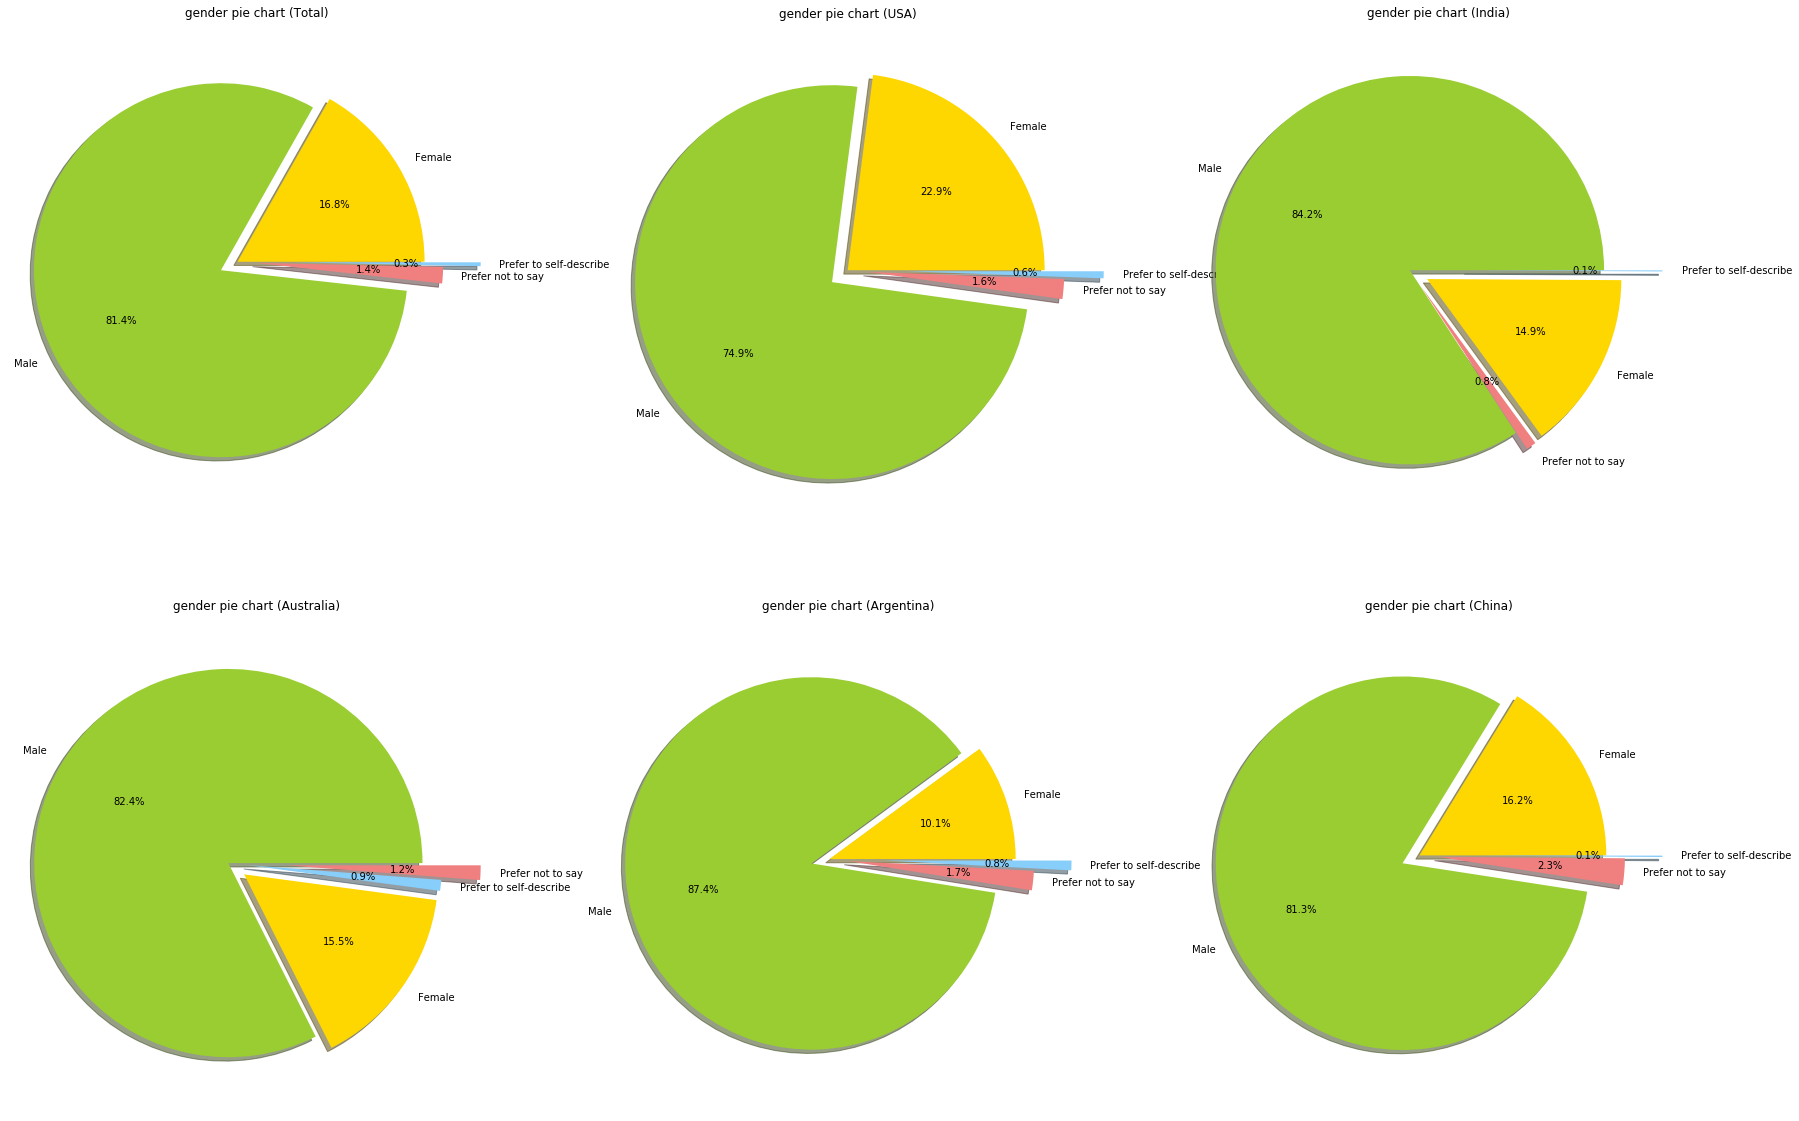

In [9]:
plt.figure(figsize=(30,20))

#Total
gender = Counter(data1['Q1'])
labels = gender.keys()
sizes = gender.values()
explode = (0,0.1,0.1,0.3)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
plt.subplot(2,3,1)
plt.pie(sizes, labels=labels, colors=colors, shadow=True, autopct='%1.1f%%', explode=explode)
plt.axis('equal')
plt.title('gender pie chart (Total)')

#USA
USA_df = data1[data1['Q3'] == 'United States of America']
USA_gender = Counter(USA_df['Q1'])
labels = USA_gender.keys()
sizes = USA_gender.values()
explode = (0,0.1,0.1,0.3)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
plt.subplot(2,3,2)
plt.pie(sizes, labels=labels, colors=colors, shadow=True, autopct='%1.1f%%', explode=explode)
plt.title('gender pie chart (USA)')

#India
India_df = data1[data1['Q3'] == 'India']
India_gender = Counter(India_df['Q1'])
labels = India_gender.keys()
sizes = India_gender.values()
explode = (0,0.1,0.1,0.3)
colors = ['yellowgreen', 'lightcoral', 'gold', 'lightskyblue']
plt.subplot(2,3,3)
plt.pie(sizes, labels=labels, colors=colors, shadow=True, autopct='%1.1f%%', explode=explode)
plt.axis('equal')
plt.title('gender pie chart (India)')

#Australia
Australia_df = data1[data1['Q3'] == 'Australia']
Australia_gender = Counter(Australia_df['Q1'])
labels = Australia_gender.keys()
sizes = Australia_gender.values()
explode = (0,0.1,0.1,0.3)
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
plt.subplot(2,3,4)
plt.pie(sizes, labels=labels, colors=colors, shadow=True, autopct='%1.1f%%', explode=explode)
plt.axis('equal')
plt.title('gender pie chart (Australia)')

#Argentina
Argentina_df = data1[data1['Q3'] == 'Argentina']
Argentina_gender = Counter(Argentina_df['Q1'])
labels = Argentina_gender.keys()
sizes = Argentina_gender.values()
explode = (0,0.1,0.1,0.3)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
plt.subplot(2,3,5)
plt.pie(sizes, labels=labels, colors=colors, shadow=True, autopct='%1.1f%%', explode=explode)
plt.axis('equal')
plt.title('gender pie chart (Argentina)')

#China
China_df = data1[data1['Q3'] == 'China']
China_gender = Counter(China_df['Q1'])
labels = China_gender.keys()
sizes = China_gender.values()
explode = (0,0.1,0.1,0.3)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
plt.subplot(2,3,6)
plt.pie(sizes, labels=labels, colors=colors, shadow=True, autopct='%1.1f%%', explode=explode)
plt.axis('equal')
plt.title('gender pie chart (China)')

plt.show()

En esta gráfica mostramos que para varios países en encuentra más o menos la misma proporción de respuestas a la pregunta del género. Particularmente es interesante que hay mucho más personas masculinas que femeninas trabajando en este campo.

# SALARIO

In [10]:
data1 = data1.rename(columns={'Q1': 'gender', 'Q2': 'age', 'Q3': 'country', 'Q4': 'education', 'Q5': 'major', 'Q6': 'role', 'Q7': 'industry','Q8': 'experience', 'Q9': 'salary'})

In [11]:
a = data1['salary'] == 'I do not wish to disclose my approximate yearly compensation'
data2 = data1[~a]

In [12]:
import math

#redefine salary
salary_list = np.zeros(len(data2))
num = 0
for s in data2['salary']:
    try:
        math.isnan(s)
        salary_list[num] = float('NaN')
        num += 1
    except:
        if s == '500,000+':
            salary_list[num] = 500.0
        else:
            salary_list[num] = np.max(np.int_(np.array(s[:-4].split('-'))))
        num+=1
data2.loc[:,'salary x1000 (USD)'] = salary_list

#redefine age
age_list = np.zeros(len(data2))
num = 0
for age in data2['age']:
    try:
        math.isnan(age)
        age_list[num] = float('NaN')
        num += 1
    except:
        if age == '80+':
            age_list[num] = 80.0
        else:
            age_list[num] = np.max(np.int_(np.array(age.split('-'))))
        num+=1
data2.loc[:,'age (years)'] = age_list
        
#redefine experience
exp_list = np.zeros(len(data2))
num = 0
for exp in data2['experience']:
    try:
        math.isnan(exp)
        exp_list[num] = float('NaN')
        num += 1
    except:
        if exp == '30 +':
            exp_list[num] = 30.0
        else:
            exp_list[num] = np.max(np.int_(np.array(exp.split('-'))))
        num+=1
data2.loc[:,'experience (years)'] = exp_list

/srv/conda/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/srv/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Estamos interesados en la distribución del salario de las personas que respondieron a esta pregunta.

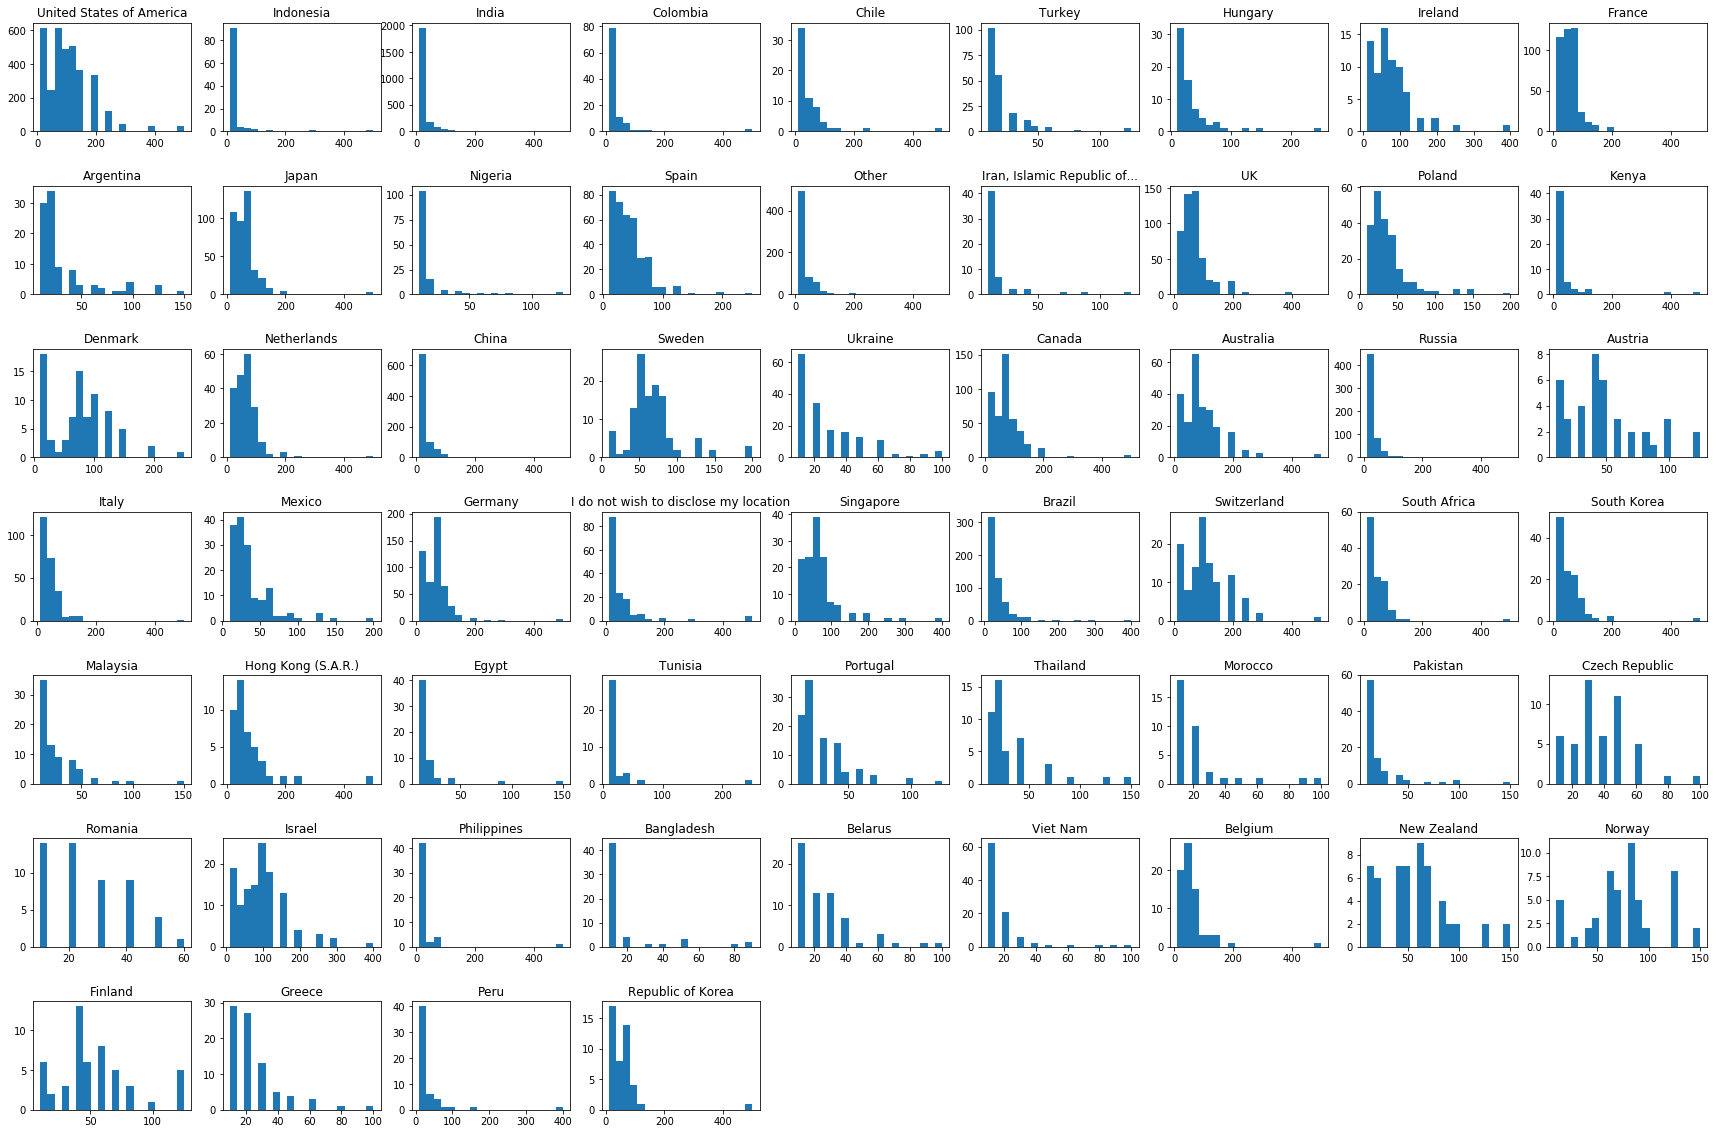

In [13]:
plt.figure(figsize=(30,20))
plt.subplots_adjust(hspace=0.5)
k = 1
for country in participation.keys():
    dataX = data2[data2['country'] == country]
    y = np.array(dataX['salary x1000 (USD)'].dropna())
    aa = y > np.mean(y)
    Y = np.int_(np.zeros(len(y)))
    Y[aa] = 1
    plt.subplot(7,9,k)
    #plt.bar(Counter(y).keys(),Counter(y).values())
    plt.hist(y, bins=20)
    if country == 'United Kingdom of Great Britain and Northern Ireland':
        plt.title('UK')
    else:
        plt.title(country)
    k += 1
plt.show()

Se muestra que como es de esperarse la distribución está concentrada en salarios 'bajos'. Algunas excepciones notables son Noruega, Austria, República Checa, Dinamarca y Rumania. Por otro ladio se muestra que en la mayoría de países subdesarrollados (latinoamérica) la distribución está muy concentrada en el salario mínimo: entre 0 y 10000 USD por año.

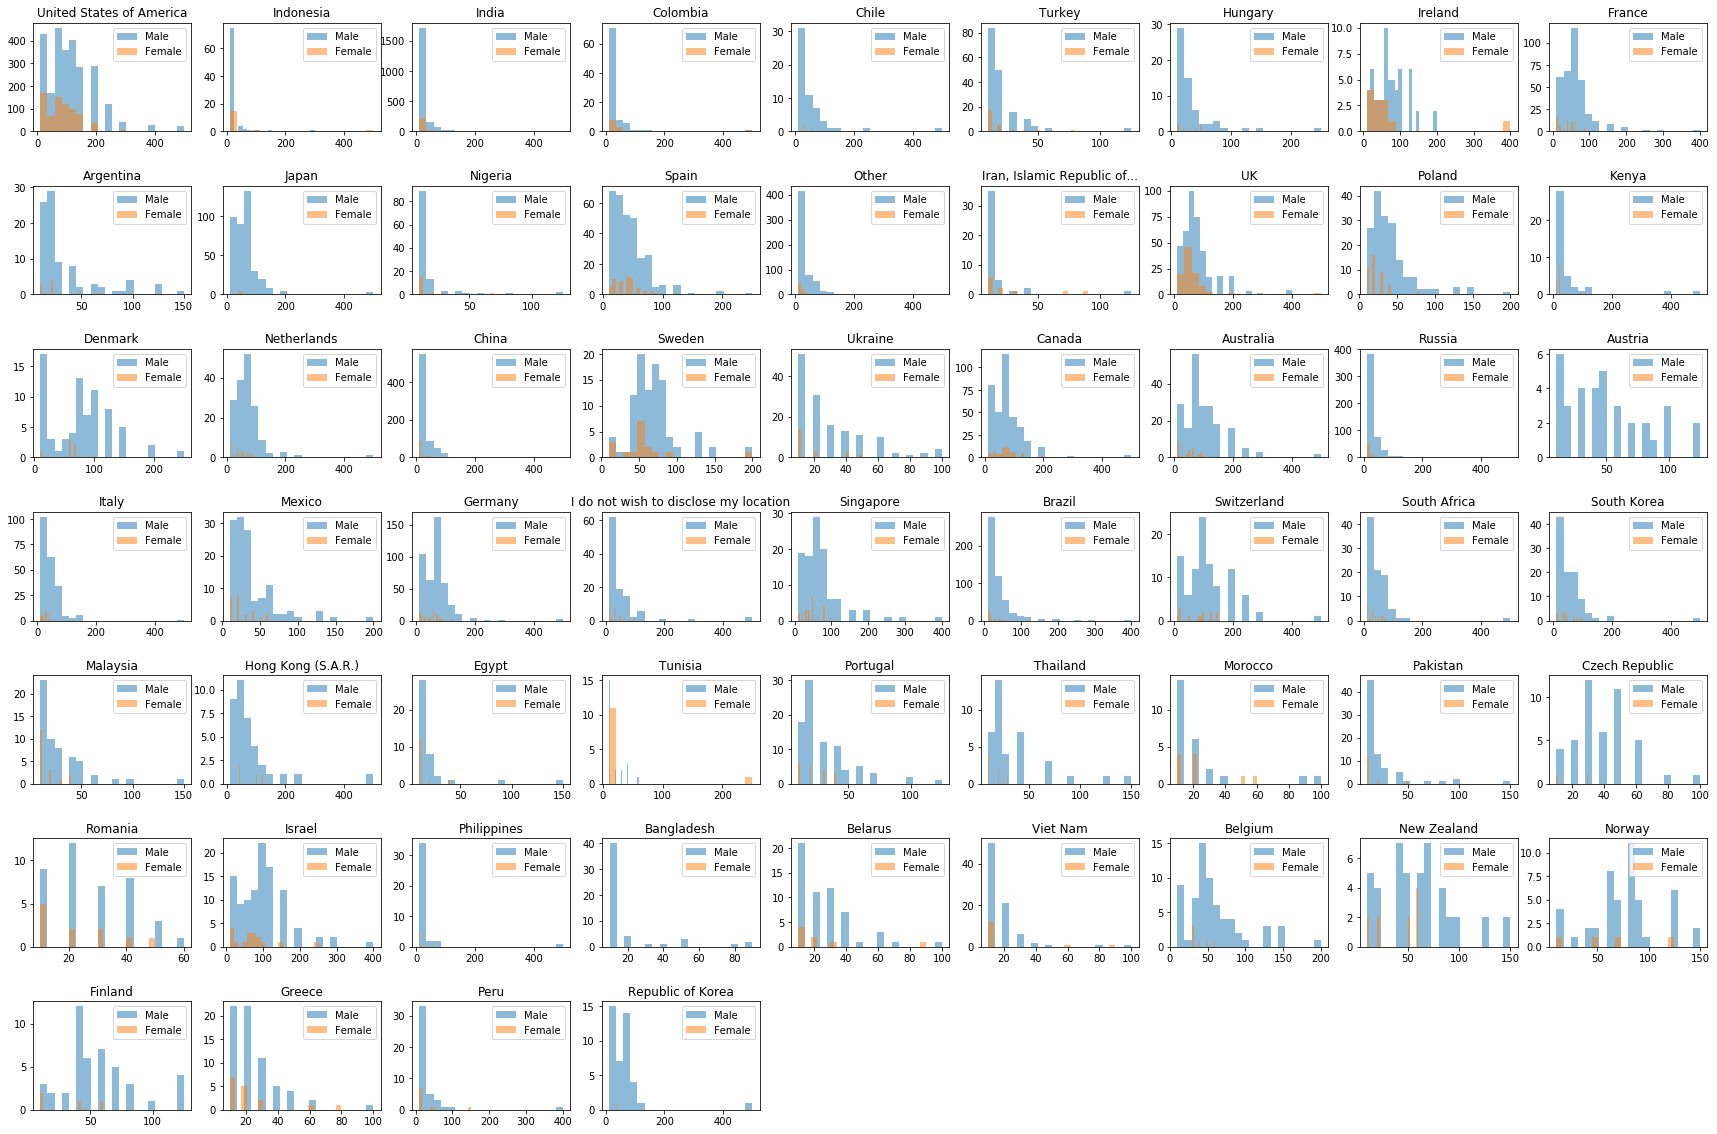

In [19]:
plt.figure(figsize=(30,20))
plt.subplots_adjust(hspace=0.5)
k = 1
for country in participation.keys():
    data3 = data2[data2['gender'] == 'Male']
    dataX = data3[data3['country'] == country]
    data4 = data2[data2['gender'] == 'Female']
    dataY = data4[data4['country'] == country]
    y = np.array(dataX['salary x1000 (USD)'].dropna())
    yy = np.array(dataY['salary x1000 (USD)'].dropna())
    plt.subplot(7,9,k)
    plt.hist(y, bins=20, alpha=0.5, label='Male')
    plt.hist(yy, bins=20, alpha=0.5, label='Female')
    if country == 'United Kingdom of Great Britain and Northern Ireland':
        plt.title('UK')
    else:
        plt.title(country)
    k += 1
    plt.legend()
plt.show()

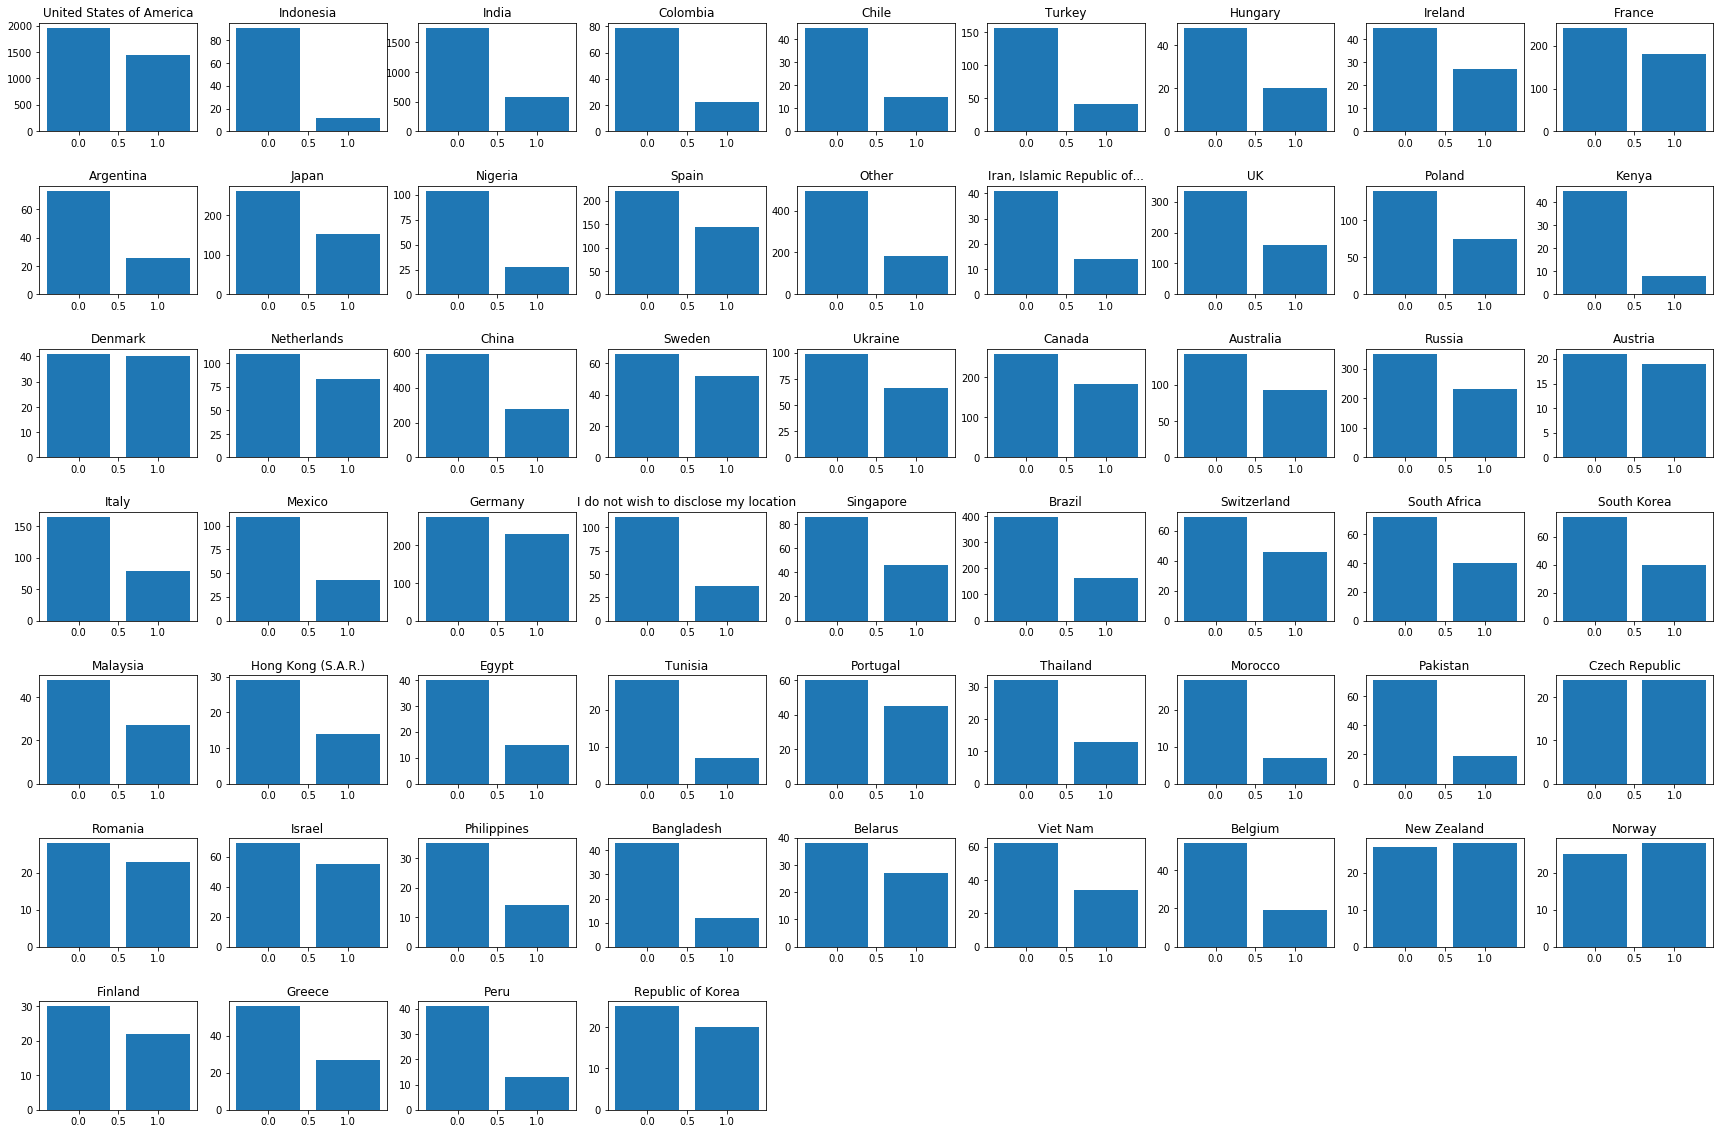

In [15]:
plt.figure(figsize=(30,20))
plt.subplots_adjust(hspace=0.5)
k = 1
for country in participation.keys():
    dataX = data2[data2['country'] == country]
    y = np.array(dataX['salary x1000 (USD)'].dropna())
    aa = y > np.mean(y)
    Y = np.int_(np.zeros(len(y)))
    Y[aa] = 1
    plt.subplot(7,9,k)
    plt.bar(Counter(Y).keys(),Counter(Y).values())
    if country == 'United Kingdom of Great Britain and Northern Ireland':
        plt.title('UK')
    else:
        plt.title(country)
    k += 1
plt.show()

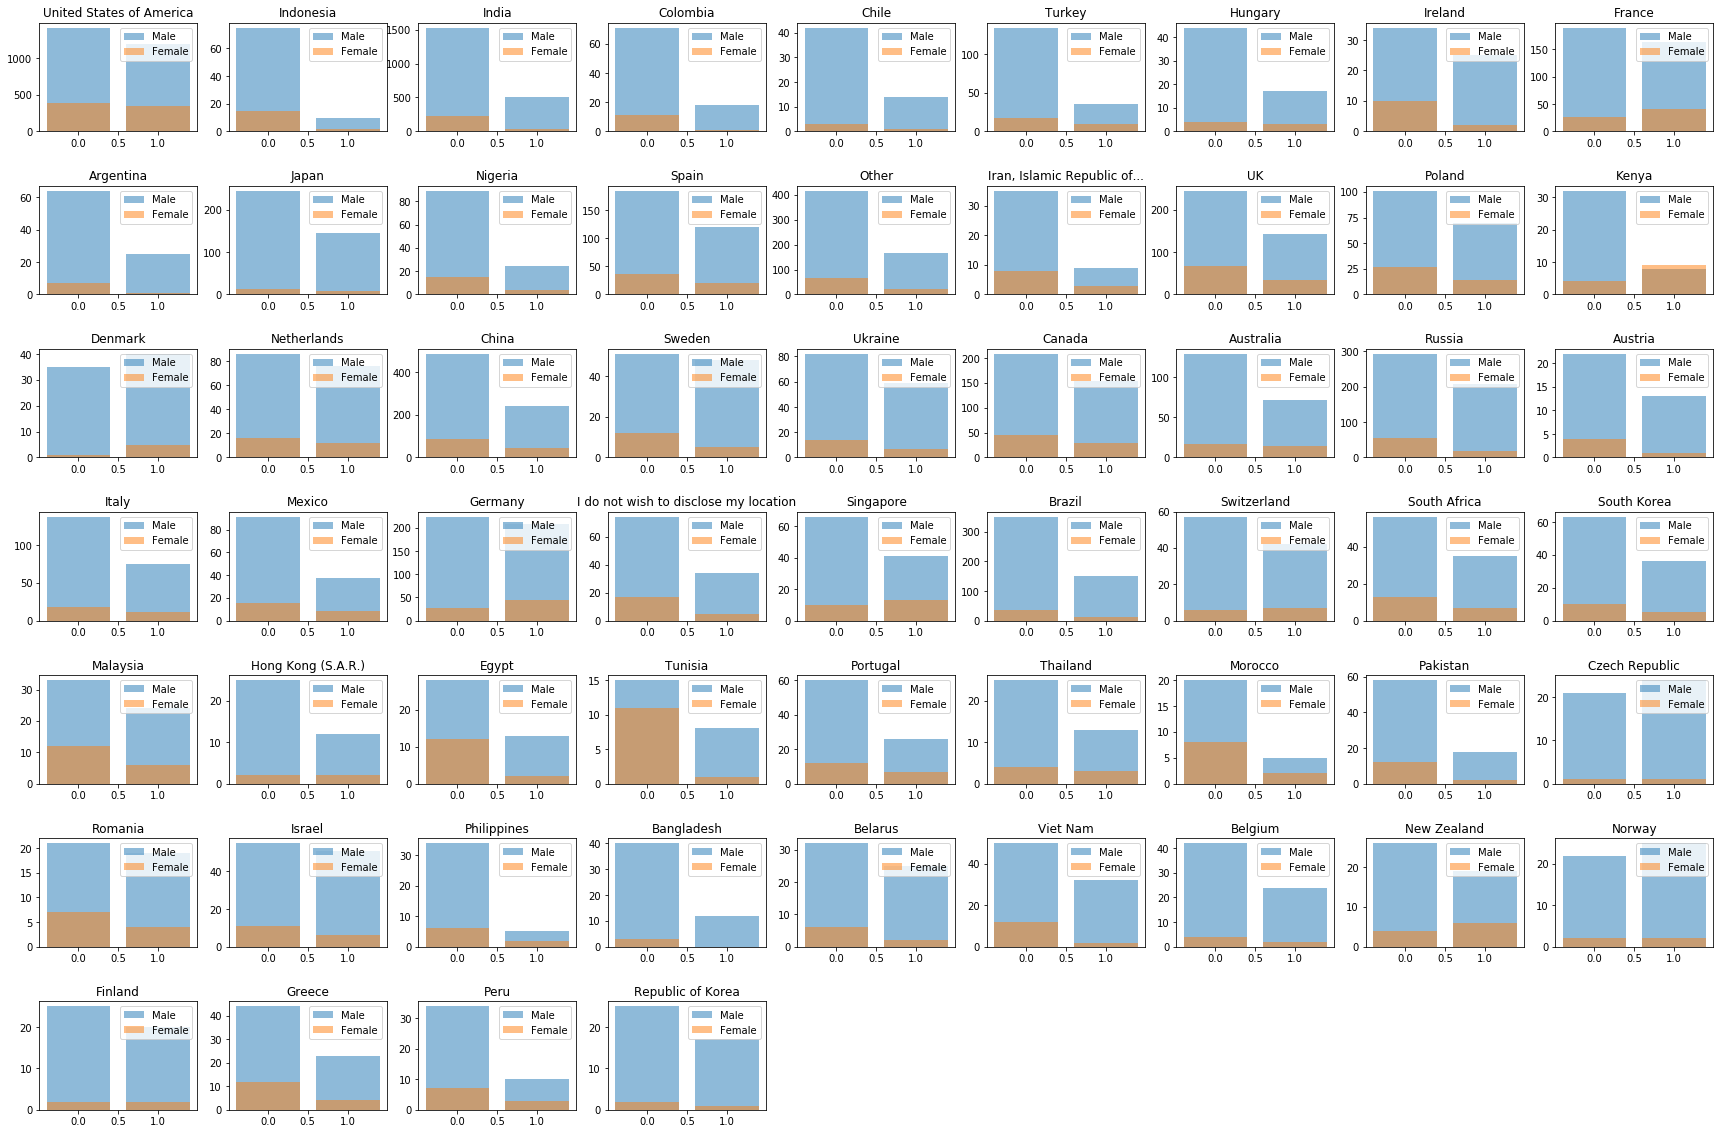

In [21]:
plt.figure(figsize=(30,20))
plt.subplots_adjust(hspace=0.5)
k = 1
for country in participation.keys():
    data3 = data2[data2['gender'] == 'Male']
    dataX = data3[data3['country'] == country]
    data4 = data2[data2['gender'] == 'Female']
    dataY = data4[data4['country'] == country]
    y = np.array(dataX['salary x1000 (USD)'].dropna())
    yy = np.array(dataY['salary x1000 (USD)'].dropna())
    
    aa = y > np.mean(y)
    Y = np.int_(np.zeros(len(y)))
    Y[aa] = 1
    aa = yy > np.mean(yy)
    YY = np.int_(np.zeros(len(yy)))
    YY[aa] = 1
    plt.subplot(7,9,k)
    plt.bar(Counter(Y).keys(),Counter(Y).values(), alpha=0.5, label='Male')
    plt.bar(Counter(YY).keys(),Counter(YY).values(), alpha=0.5, label='Female')
    
    #plt.hist(y, bins=20, alpha=0.5, label='Male')
    #plt.hist(yy, bins=20, alpha=0.5, label='Female')
    if country == 'United Kingdom of Great Britain and Northern Ireland':
        plt.title('UK')
    else:
        plt.title(country)
    k += 1
    plt.legend()
plt.show()